텐서(tensor)
  - 자료형에 해당
  - 여러 형태가 가능한 넘파이 배열
  - 배열 차원을 랭크로 표현

  1차원 스칼라 0-D tensor 랭크 0   
  2차원 벡터  1-D tensor 랭크 1   
  3차원 행렬 2-D tensor 랭크 2   

In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
a = tf.constant(2) #텐서 선언
b = tf.constant([1,2])
c = tf.constant([[1,2],[3,4]])
print(tf.rank(a)) # 텐서 랭크 계산
print(tf.rank(b))
print(tf.rank(c))

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [3]:
a = tf.constant(2)
b = tf.constant(3)

print(tf.add(a,b)) 
print(tf.subtract(a,b))
print(tf.multiply(a,b).numpy()) # 넘파이 arr로 반환
print(tf.divide(a,b).numpy())

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
6
0.6666666666666666


In [4]:
type(tf.multiply(a,b).numpy())

numpy.int32

- 넘파이 배열로 변환하여 사용해보기
  - numpy()와 convert_to_tensor() 함수 # 넘파이로 텐서로 변경
  - 변환이 매우 유연

In [5]:
import numpy as np
c = tf.add(a,b).numpy() # a+b한 후 Numpy배열로 변환
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square) # 텐서로 변환

print(f'numpy array : {c}, \
      applying square with numpy : {c_square}, \
      convert_to_tensor : {c_tensor}')

numpy array : 5,       applying square with numpy : 25.0,       convert_to_tensor : 25.0


In [6]:
@tf.function
def square_pos(x):
  if x>0:
    x = x * x
  else:
    x = x * -1
  return x

print(square_pos(tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

tf.random.set_seed(777)
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[1]])

model = Sequential()
model.add(Dense(1, input_shape = (2,), activation = 'linear'))

model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])

model.fit(x,y, epochs=500)

Epoch 1/500
1/1 [==============================] - 4s 4s/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 20ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss:

In [10]:
model.get_weights() # 모델 가중치 확인하기

[array([[0.49431452],
        [0.37552655]], dtype=float32), array([0.3271933], dtype=float32)]

In [11]:
# evaluate(): 평가를 진행합니다.
model.evaluate(x,y)

#predict(): 예측을 진행
preds = model.predict(x)
for a, b in zip(preds, y):
  print(f"예측값 {a} - 정답 {b}")

1/1 [==============================] - 0s 234ms/step - loss: 0.0665 - acc: 1.0000
예측값 [0.3271933] - 정답 [0]
예측값 [0.7027198] - 정답 [1]
예측값 [0.8215078] - 정답 [1]
예측값 [1.1970344] - 정답 [1]


In [12]:
# 벡터의 내적 연산
x = tf.random.uniform((10,5))
w = tf.random.uniform((5,3))
d = tf.matmul(x,w) # (10,5) * (5,3) -> (10,3)

print(f'x와 w의 벡터 내적 결과 크기: {d.shape}')

x와 w의 벡터 내적 결과 크기: (10, 3)


In [13]:
tf.random.set_seed(777)
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(1, input_shape = (2,), activation = 'linear'))

model.compile(optimizer = SGD(),
              loss = mse,
              metrics = ['acc'])

model.fit(x,y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 343ms/step - loss: 0.9969 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 0.9642 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 0.9334 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9043 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8770 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 0.8512 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 0.8270 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8041 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7825 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7621 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.

In [14]:
# evaluate(): 평가를 진행합니다.
model.evaluate(x,y)

#predict(): 예측을 진행
preds = model.predict(x)
for a, b in zip(preds, y):
  print(f"예측값 {a} - 정답 {b}")

1/1 [==============================] - 0s 81ms/step - loss: 0.2519 - acc: 0.5000
예측값 [0.48344818] - 정답 [0]
예측값 [0.43800855] - 정답 [1]
예측값 [0.5567965] - 정답 [1]
예측값 [0.51135683] - 정답 [0]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

tf.random.set_seed(777)
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(32, input_shape = (2,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = RMSprop(),
              loss = mse,
              metrics = ['acc'])

model.fit(x,y, epochs=100)

In [16]:
# evaluate(): 평가를 진행합니다.
model.evaluate(x,y)

#predict(): 예측을 진행
preds = model.predict(x)
for a, b in zip(preds, y):
  print(f"예측값 {a} - 정답 {b}")

1/1 [==============================] - 0s 96ms/step - loss: 0.2106 - acc: 1.0000
예측값 [0.48656905] - 정답 [0]
예측값 [0.552116] - 정답 [1]
예측값 [0.5464304] - 정답 [1]
예측값 [0.4465039] - 정답 [0]


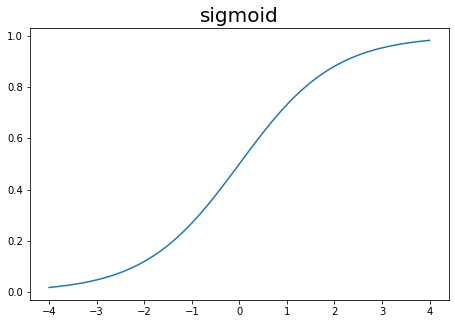

In [17]:
import matplotlib.pyplot as plt
import math
# 시그모이드 함수 그려보기
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 하이퍼 볼릭 탄젠트 함수
def tanh(x):
  return list(map(lambda x : math.tanh(x),x))

# ReLU 함수
def relu(x):
  result = []
  for ele in x:
    if(ele <= 0):
      result.append(0)
    else:
      result.append(ele)

  return result

# 시그모이드 함수 그려보기
x = np.linspace(-4,4,100)
sig = sigmoid(x)

plt.figure(figsize=(7.5,5))
plt.plot(x,sig); plt.title('sigmoid', fontsize = 20)
plt.show()

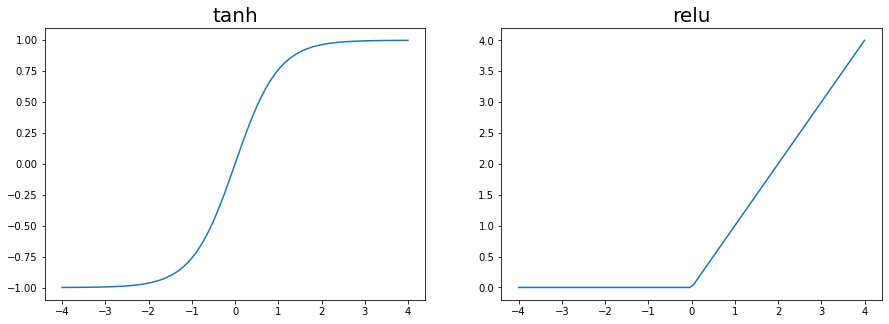

In [18]:
tan_h = tanh(x)
relu_d = relu(x)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(x,tan_h); plt.title('tanh', fontsize = 20)
plt.subplot(1,2,2)
plt.plot(x, relu_d); plt.title('relu', fontsize =20)
plt.show()

In [19]:
lr_list = [0.001, 0.1, 0.5, 0.9] # 여러가지 학습률로 변화 관찰

def get_derivative(lr): 
  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y=x^2로 정의

  for i in range(1,10):
    # 해당위치의 미분값을 구함
    dev_value = w_old * 2

    # 위의 값을 이용해 가중치 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) # 업데이트 된 가중치를 저장
    y.append(w_old ** 2) # 업데이트 된 가중치의 손실 값을 저장

  return derivative, y

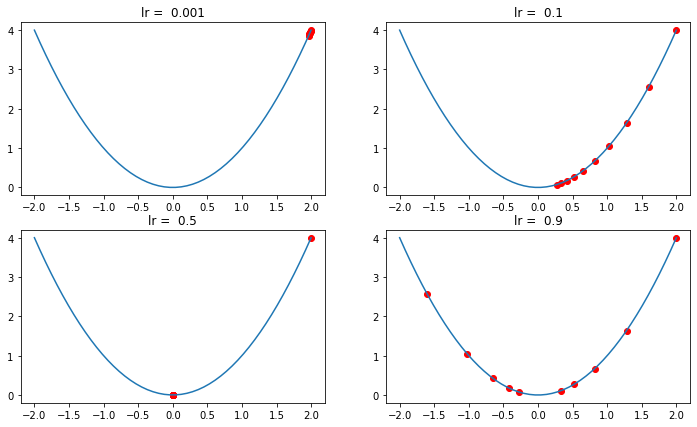

In [20]:
x = np.linspace(-2, 2, 50) #-2~2의 범위를 50구간으로 나눈 배열을 반환
x_square = [i ** 2 for i in x]

fig = plt.figure(figsize = (12,7))

for i, lr in enumerate(lr_list):
  derivative, y = get_derivative(lr)
  ax = fig.add_subplot(2,2,i+1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr =  '+str(lr))

plt.show()